In [45]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ------------------------- ------------- 194.6/294.9 kB 12.3 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.8 MB/s eta 0:00:00


In [7]:
df = pd.read_csv(r'C:\Users\PrajeeshR\OneDrive - kyndryl\Desktop\personalgit\MachineLearning\Supervised ML\Datasets\banana_quality.csv')
df_labels = df.drop(columns={'Quality'})
df_target = df.Quality

In [11]:
df.shape

(8000, 8)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


In [13]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

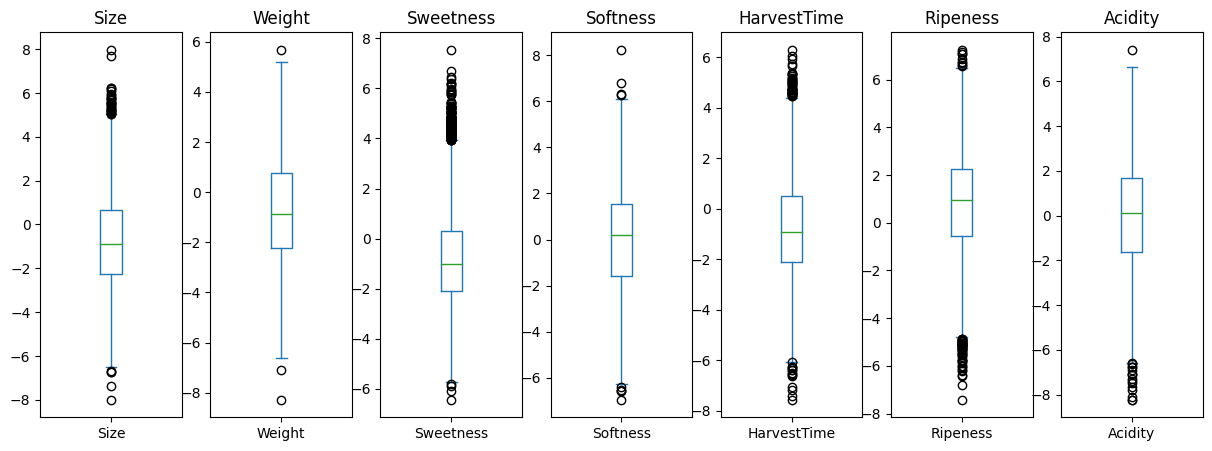

In [26]:
num_cols = 7
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].plot(kind='box',ax=ax)
        ax.set_title(df_labels.columns[i])

In [27]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


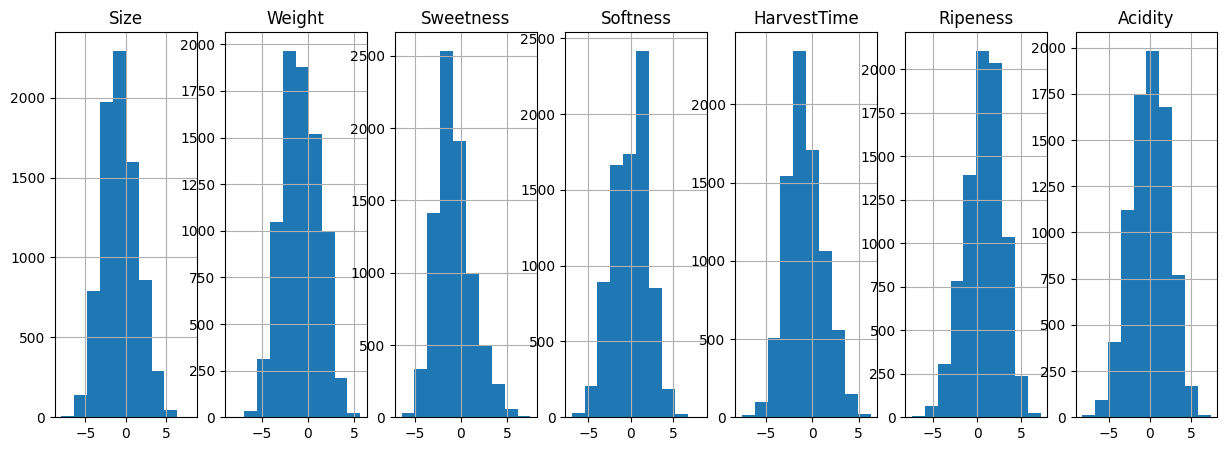

In [29]:
num_cols = 7
num_rows = (df_labels.shape[1] + num_cols - 1) //num_cols
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))
for i, ax in enumerate(axes.flatten()):
    if i < df_labels.shape[1]:
        df_labels.iloc[:, i].hist(ax=ax)
        ax.set_title(df_labels.columns[i])

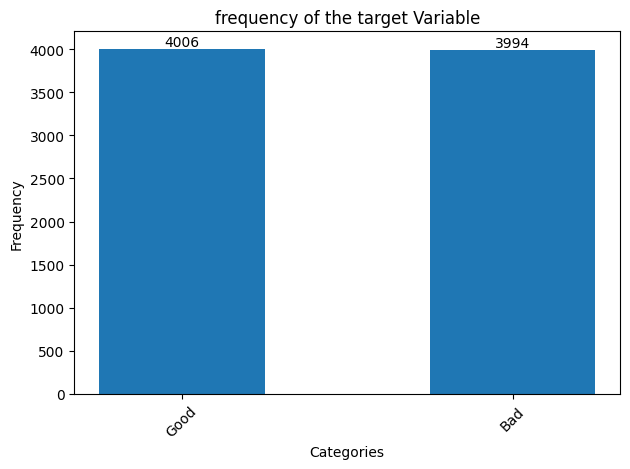

In [30]:
value_counts = df_target.value_counts()

plt.bar(value_counts.index, height=value_counts.values, width=0.5)
for i, value in enumerate(value_counts.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.xlabel('Categories')
plt.ylabel('Frequency')
plt.title('frequency of the target Variable')
plt.xticks(rotation=45)  # Rotating x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Axes: >

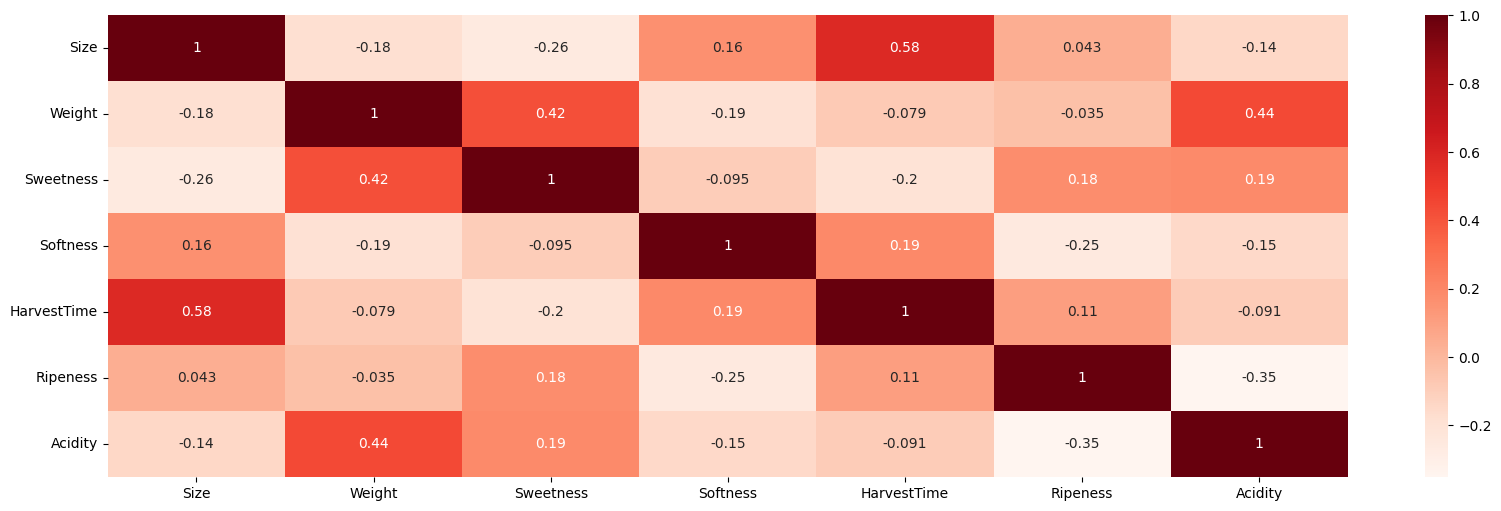

In [31]:
plt.figure(figsize=(20,6))
corr_matrix = df_labels.corr(numeric_only=True)
sns.heatmap(corr_matrix,cmap='Reds',annot=True)

In [33]:
df_encoded_Labels = df_labels.copy()
scalar = StandardScaler()
df_encoded_Labels = scalar.fit_transform(df_encoded_Labels)
X = df_encoded_Labels
Y = df_target.copy()

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=7)
print("The shape xtrain: ", xtrain.shape)
print("The shape xtest: ",xtest.shape)
print("The shape of ytrain: ",ytrain.shape)
print("The shape of ytest", ytest.shape)

The shape xtrain:  (5600, 7)
The shape xtest:  (2400, 7)
The shape of ytrain:  (5600,)
The shape of ytest (2400,)


In [35]:
log_reg_model = LogisticRegression()

In [36]:
log_reg_model.fit(xtrain,ytrain)

LogisticRegression()

In [43]:
prediction = log_reg_model.predict(xtest)
accuracy = accuracy_score(y_true=ytest,y_pred=prediction)
classificationreport = classification_report(y_true=ytest,y_pred=prediction,target_names=np.unique(df_target.values))

In [44]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Classification Report:")
print(classificationreport)

Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

         Bad       0.89      0.85      0.87      1210
        Good       0.86      0.89      0.87      1190

    accuracy                           0.87      2400
   macro avg       0.87      0.87      0.87      2400
weighted avg       0.87      0.87      0.87      2400



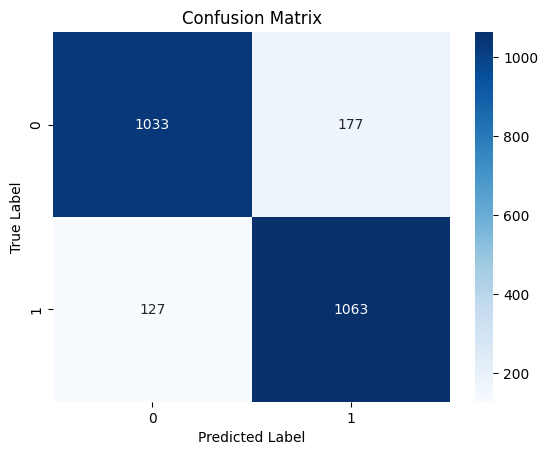

In [48]:
cm = confusion_matrix(ytest,prediction)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()